In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense ,Dropout
from tensorflow.keras.optimizers import SGD

In [2]:
import pandas as pd
train_data = pd.read_csv('../LP-IV-datasets/MNIST(Ass2&3)/mnist_train.csv')
test_data = pd.read_csv('../LP-IV-datasets/MNIST(Ass2&3)/mnist_test.csv')

In [8]:
x_train=train_data.drop('label',axis=1).values
y_train=train_data['label'].values

x_test=test_data.drop('label',axis=1).values
y_test=test_data['label'].values


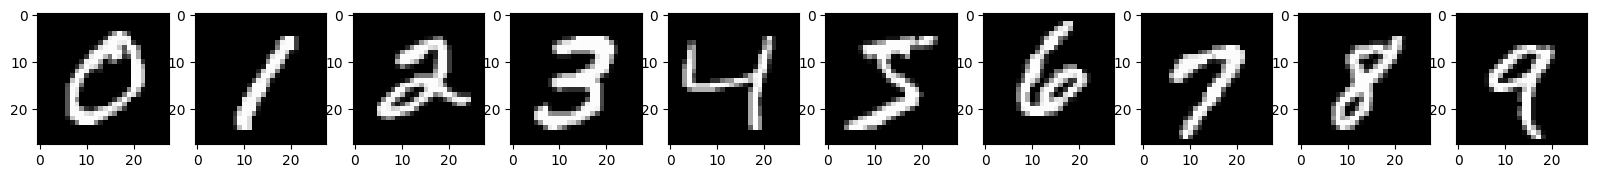

In [9]:
f,ax=plt.subplots(1,10,figsize=(20,20))
for i in range(0,10):
    sam=x_train[y_train==i][0].reshape(28,28)
    ax[i].imshow(sam,cmap='gray')


In [10]:
num_classes=10

x_train=x_train.astype("float32")/255.0
x_test=x_test.astype("float32")/255.0

x_train=x_train.reshape((-1,28*28))   # -1,28*28
x_test=x_test.reshape((-1,28*28))   # -1,28*28

y_train=keras.utils.to_categorical(y_train,num_classes)
y_test=keras.utils.to_categorical(y_test,num_classes)

In [11]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 784) (60000, 10)
(10000, 784) (10000, 10)


In [12]:
model=Sequential()
model.add(Dense(128,input_shape=(28*28,),activation="relu"))    #28*28
model.add(Dense(64,activation="relu"))
model.add(Dense(num_classes,activation="softmax"))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               100480    
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109386 (427.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])
history = model.fit(x_train,y_train,epochs=11,validation_data=(x_test,y_test),batch_size=128)   #11

Epoch 1/11
469/469 [==============================] - 5s 8ms/step - loss: 0.3414 - accuracy: 0.9017 - val_loss: 0.1626 - val_accuracy: 0.9535
Epoch 2/11
469/469 [==============================] - 3s 6ms/step - loss: 0.1354 - accuracy: 0.9603 - val_loss: 0.1126 - val_accuracy: 0.9653
Epoch 3/11
469/469 [==============================] - 3s 7ms/step - loss: 0.0928 - accuracy: 0.9724 - val_loss: 0.0902 - val_accuracy: 0.9702
Epoch 4/11
469/469 [==============================] - 3s 7ms/step - loss: 0.0696 - accuracy: 0.9787 - val_loss: 0.0827 - val_accuracy: 0.9739
Epoch 5/11
469/469 [==============================] - 3s 7ms/step - loss: 0.0550 - accuracy: 0.9831 - val_loss: 0.0762 - val_accuracy: 0.9763
Epoch 6/11
469/469 [==============================] - 3s 7ms/step - loss: 0.0444 - accuracy: 0.9861 - val_loss: 0.0697 - val_accuracy: 0.9775
Epoch 7/11
469/469 [==============================] - 3s 7ms/step - loss: 0.0350 - accuracy: 0.9890 - val_loss: 0.0850 - val_accuracy: 0.9734
Epoch 

In [90]:
score=model.evaluate(x_test,y_test)
print('test loss',score[0])
print('test acc',score[1])

313/313 [==============================] - 2s 5ms/step - loss: 0.1996 - accuracy: 0.9428
test loss 0.19957709312438965
test acc 0.942799985408783


313/313 [==============================] - 2s 5ms/step
Actual Number:  9
Predicted Number:  9


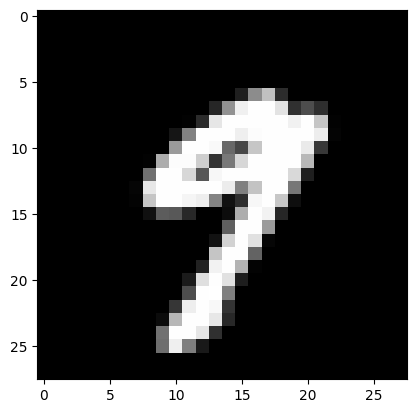

In [95]:
n = 20
plt.imshow(x_test[n].reshape(28, 28), cmap='gray')
predicted_value = model.predict(x_test)
print("Actual Number: ",np.argmax(y_test[n]))
print("Predicted Number: ", np.argmax(predicted_value[n]))

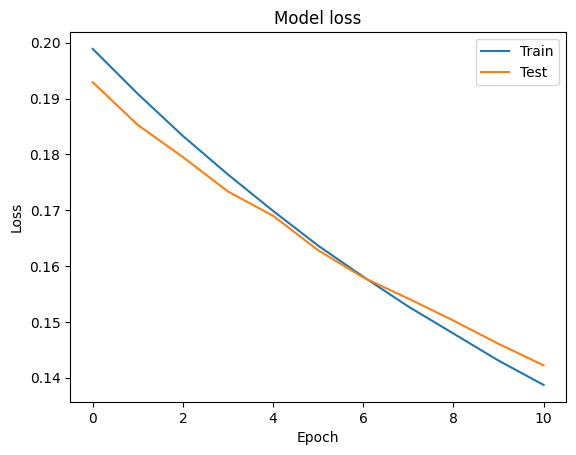

In [96]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

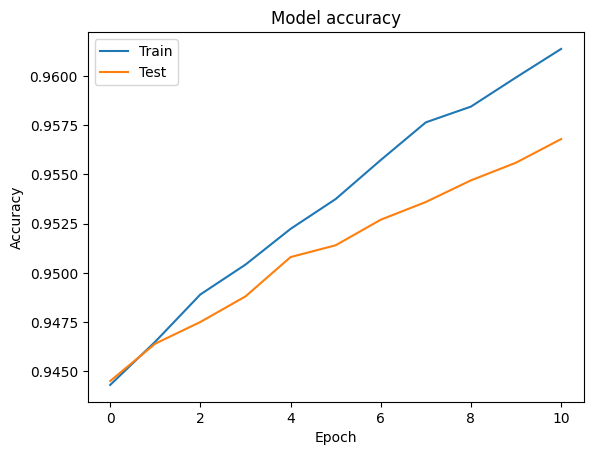

In [97]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
     